In [40]:
import numpy as np
import math
import random as r
import pylab
import matplotlib.pyplot as plt

## Sign function
sign = lambda x : math.copysign(1,x)

N = 10
N2 = N**2


In [41]:
def RandomL(N):
    latt = np.zeros((N,N), dtype=int)
    for i in range(N):
        for j in range(N):
            latt[i,j] = sign(2*r.random() - 1)
    return latt

def CEnergy(latt, N):
    Ene = 0
    for i in range(N):
        for j in range(N):
            S = latt[i,j]
            WF = latt[i, (j+1)%N] + latt[i, (j-1)%N] + latt[(i+1)%N, j] + latt[(i-1)%N, j]
            Ene += -S*WF
    return int(Ene/2.)


In [42]:
def MCMC(Nitt, N, T):
    Aven = 0.0
    latt = RandomL(N)
    Ene = CEnergy(latt, N)
    density = np.zeros(N*N+1, dtype=int).tolist() #keep track of energy values
    for i in range(Nitt):
        ii = int(r.random()*100)
        (i,j) = (ii%N, ii//N)
        S = latt[i,j]
        WF = latt[i, (j+1)%N] + latt[i, (j-1)%N] + latt[(i+1)%N, j] + latt[(i-1)%N, j]
        Enew = Ene + 2*S*WF
        P = min(1, math.exp((Ene-Enew)/T))
        if P > r.random(): #metropolis condition
            latt[i,j] = -S #flip the state of lattice
            Ene = Enew #update energy
        density[50+Ene//4] += 1 #update density of states
        Aven += Ene
    return (density, Aven/Nitt) # return the dos and avg energy for the given temperature

Energies = (4*np.arange(N2+1)-2*N2).tolist()


<Figure size 800x600 with 0 Axes>

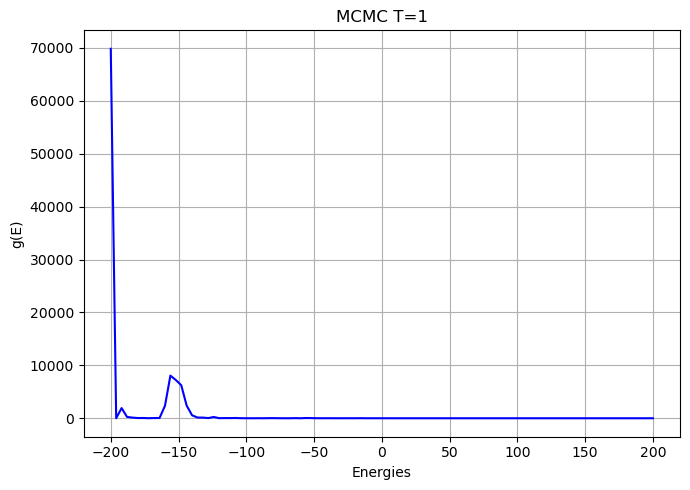

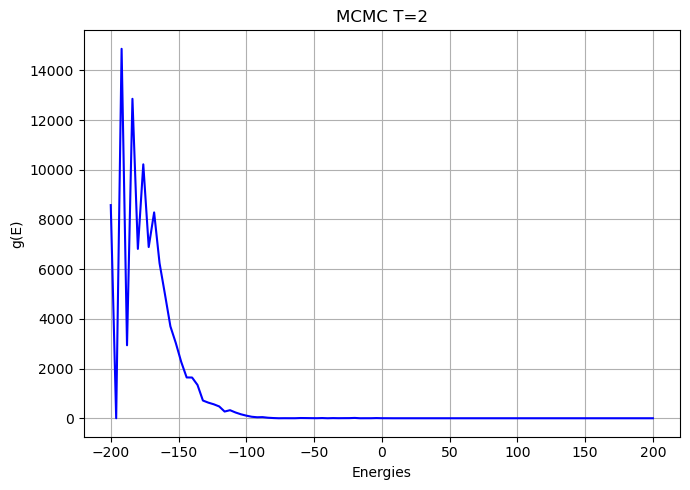

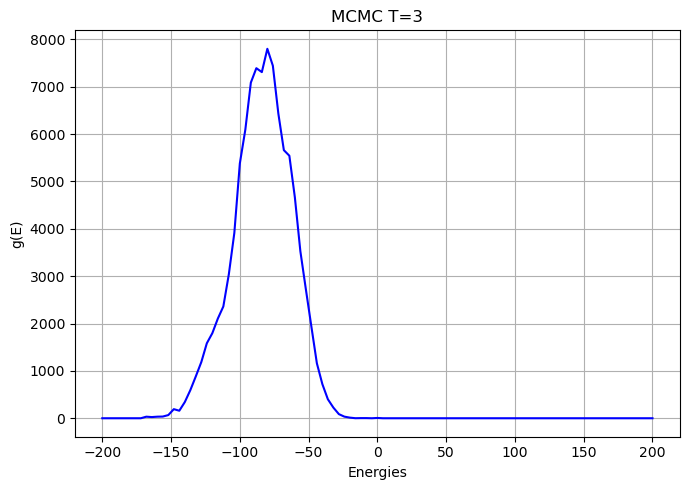

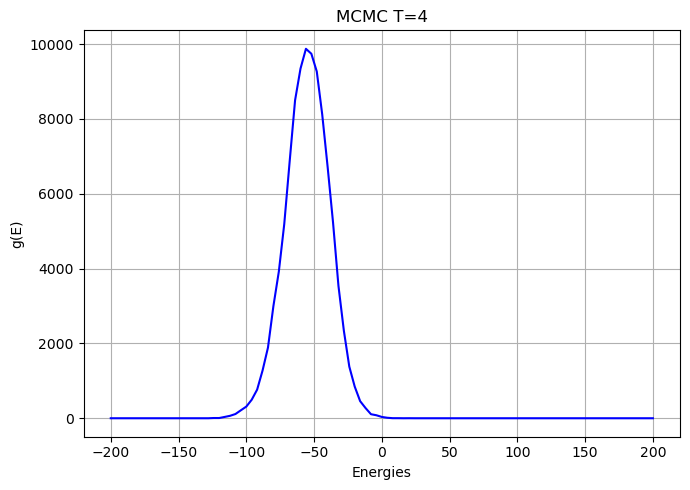

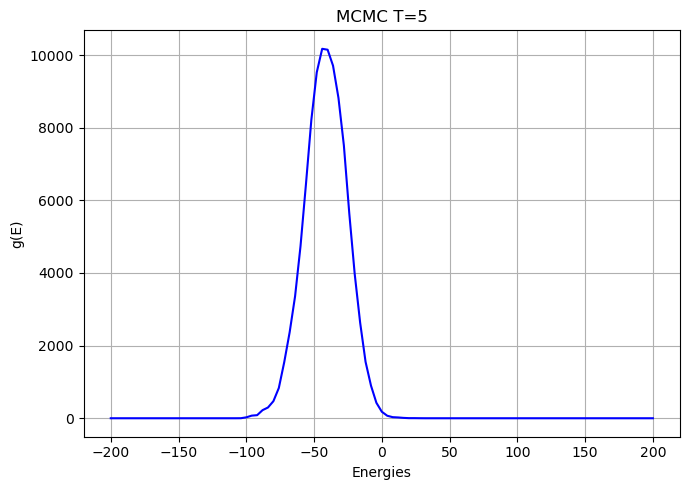

In [45]:

rng = np.random.default_rng(42)
N = 10
Nitt = int(1e5)
temps = [1, 2, 3, 4, 5]
plt.figure(figsize=(8,6))
for idx, T in enumerate(temps):
    density, energy = MCMC(Nitt, N, T, rng)
    plt.figure(figsize=(7,5))
    plt.plot(energy, density, 'b')
    plt.xlabel('Energies')
    plt.ylabel('g(E)')
    plt.title(f'MCMC T={T}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    # # Optional: for saving
    # # plt.savefig(f"mcmc_T{T}.png", dpi=150)
    # print(f"Figure A.{idx+1}: MCMC T={T}\n")